# Feature detection

## Harris Corner detection

As always we start with the imports

In [67]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

As a start we will use the same checkerboard image as earlier.

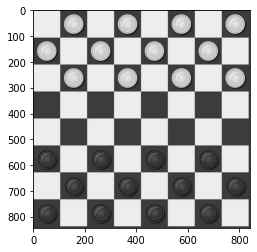

In [68]:
img = cv2.imread('checkers.png')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

### Exercise 2a
Fill in the missing code in the next block. We would like to detect the corners of the image using the OpenCV function [cv2.cornerHarris](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=cornerharris#cornerharris). Afterwards we would like to draw the location of the detected corners on the image and display it.

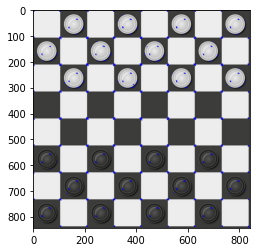

In [69]:
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

dst = cv2.cornerHarris(gray, 2, 3, 0.04)

dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.00001*dst.max()]=[0,0,255]


### Draw the detected corners in the original image here ###

# Display image
plt.imshow(img)

## Shi-Tomasi
Next we will try the Shi-Tomasi feature detection method. In OpenCV the function is called [cv2.goodFeaturesToTrack](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html#goodfeaturestotrack). 
Let's start with a different image this time.

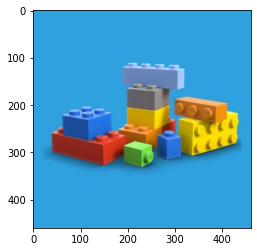

In [70]:
img = cv2.imread('Lego.jpg')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

### Exercise 2b
Just like the previous exercise, detect the corners of the image by inserting the missing code, this time using the Shi-Tomasi (good features to track) method. Draw the detected corners on the image. Check the documentation of the function for help.

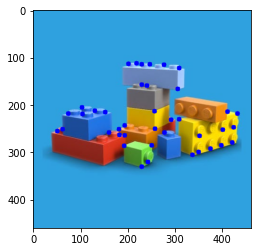

In [71]:
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

### Insert goodFeaturesToTrack detector here ###

# Find the top 20 corners using the cv2.goodFeaturesToTrack()
corners = cv2.goodFeaturesToTrack(gray,40,0.01,10)
corners = np.int0(corners)
 
img_gftt = img.copy()
# Iterate over the corners and draw a circle at that location
for i in corners:
    x,y = i.ravel()
    cv2.circle(img_gftt,(x,y),5,(0,0,255),-1)

### Draw the detected corners in the original image here ###

# Display image
plt.imshow(img_gftt)

### Exercise 2c
Do a Harris corner detection on the same Lego image and compare the result with the Shi-Tomasi image.

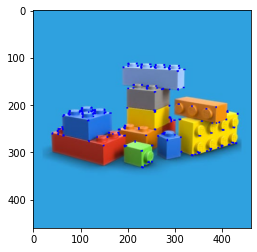

In [72]:
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

dst = cv2.cornerHarris(gray, 2, 3, 0.04)

dst = cv2.dilate(dst,None)

img_cH = img.copy() 
# Threshold for an optimal value, it may vary depending on the image.
img_cH[dst>0.005*dst.max()]=[0,0,255]


### Draw the detected corners in the original image here ###

# Display image
plt.imshow(img_cH)